<a href="https://colab.research.google.com/github/datascience-vivek/Logistic_Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/hearing_test.csv')

In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [ ]:
df.shape

(5000, 3)

In [ ]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [ ]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

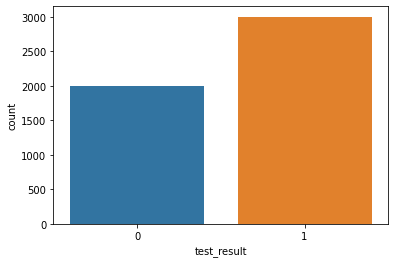

In [ ]:
sns.countplot(data=df, x='test_result')

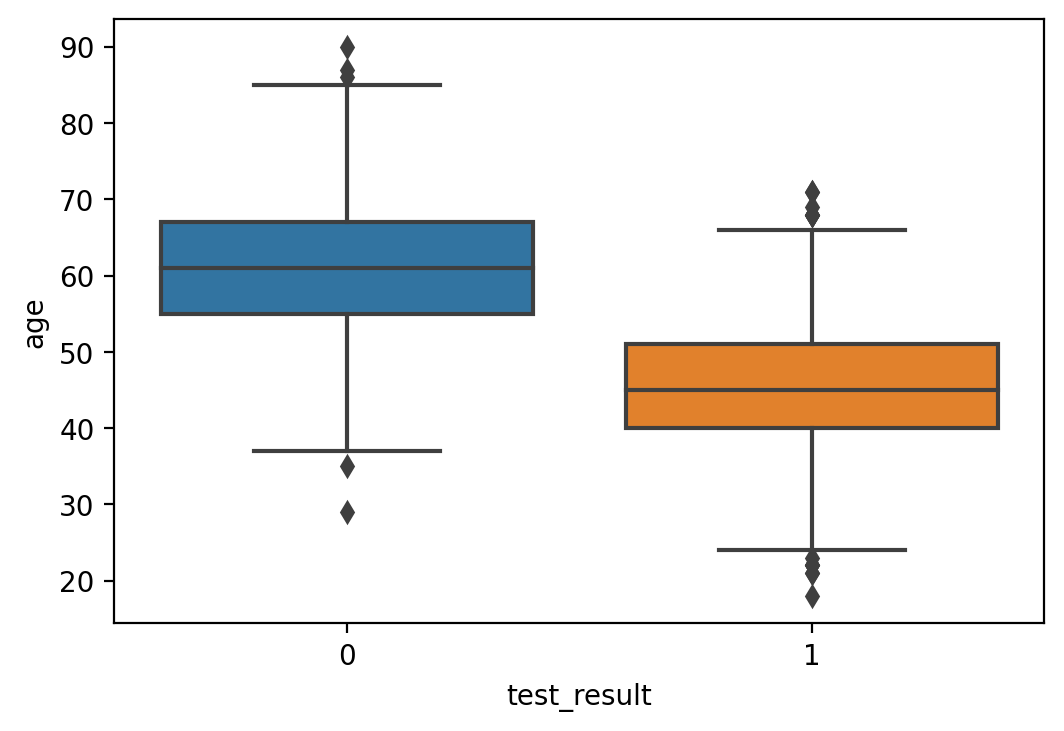

In [ ]:
plt.figure(dpi= 200)
sns.boxplot(x= 'test_result', y= 'age', data= df)

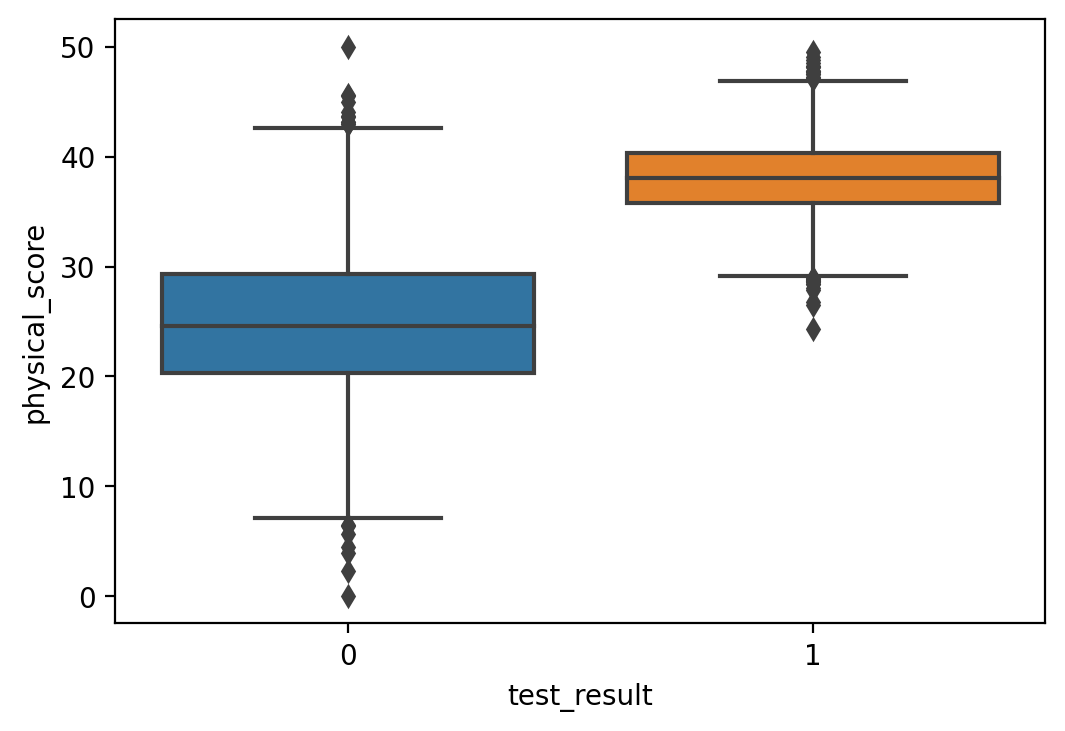

In [ ]:
plt.figure(dpi= 200)
sns.boxplot(x= 'test_result', y= 'physical_score', data= df)

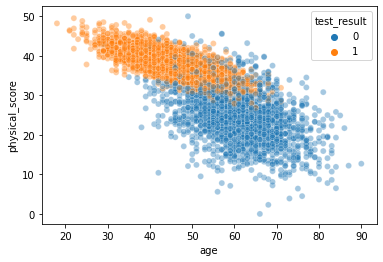

In [ ]:
sns.scatterplot(x='age', y= 'physical_score', data =df, hue= 'test_result', alpha= 0.4)

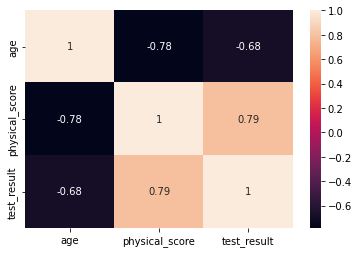

In [ ]:
sns.heatmap(df.corr(), annot = True)

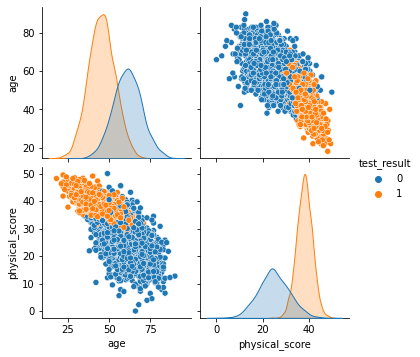

In [ ]:
sns.pairplot(df, hue = 'test_result')

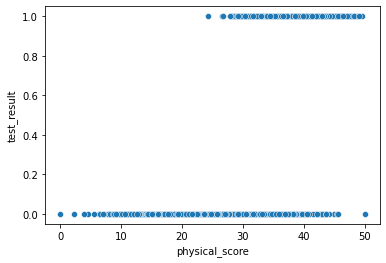

In [16]:
sns.scatterplot(x= 'physical_score', y ='test_result', data = df)
##WE never prefer scatterplot for classification.

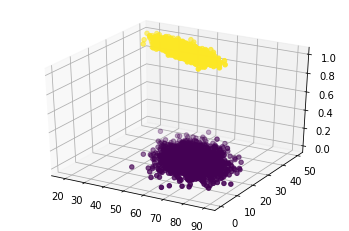

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d') 
ax.scatter(df['age'], df['physical_score'], df['test_result'], c =df['test_result'])

In [20]:
##Training my Logistic Model:
#Seperate the features:
x= df.drop('test_result', axis= 1)

In [22]:
y= df['test_result']

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.1, random_state= 101)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
scaled_x_train = scaler.fit_transform(x_train)

In [28]:
scaled_x_test = scaler.fit_transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model = LogisticRegression()

In [31]:
log_model.fit(scaled_x_train, y_train)

LogisticRegression()

In [33]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [34]:
y_pred =log_model.predict(scaled_x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [35]:
y_pred[0]

1

In [36]:
y_pred1 =log_model.predict_proba(scaled_x_test)
y_pred1

array([[3.09267151e-02, 9.69073285e-01],
       [3.46183276e-02, 9.65381672e-01],
       [9.89850652e-01, 1.01493479e-02],
       [2.63867805e-03, 9.97361322e-01],
       [9.76798467e-01, 2.32015329e-02],
       [9.90296858e-01, 9.70314158e-03],
       [9.17503241e-02, 9.08249676e-01],
       [2.23885958e-02, 9.77611404e-01],
       [9.97136737e-01, 2.86326280e-03],
       [4.21538922e-02, 9.57846108e-01],
       [1.02178637e-01, 8.97821363e-01],
       [1.32310276e-02, 9.86768972e-01],
       [9.53021603e-03, 9.90469784e-01],
       [9.41001469e-01, 5.89985310e-02],
       [1.73909902e-04, 9.99826090e-01],
       [8.23877636e-02, 9.17612236e-01],
       [9.89664721e-01, 1.03352792e-02],
       [3.85833550e-03, 9.96141665e-01],
       [7.99114453e-04, 9.99200886e-01],
       [9.96617310e-01, 3.38268988e-03],
       [8.93305492e-01, 1.06694508e-01],
       [1.57519985e-01, 8.42480015e-01],
       [5.84191779e-01, 4.15808221e-01],
       [4.37511514e-02, 9.56248849e-01],
       [4.394643